# Difference between gridded field (GRIB) and scattered observations (BUFR)

Metview reads GRIB and BUFR data into its [Fieldset](https://confluence.ecmwf.int/display/METV/Fieldset+Functions) and [Bufr](https://confluence.ecmwf.int/display/METV/Observations+Functions) classes respectively.
As these are based on Macro data types, see the Macro documentation linked to above.

In [1]:
import metview as mv

In [2]:
t2m_grib = mv.read('./t2m_grib.grib')
obs_3day = mv.read('./obs_3day.bufr')

BUFR can contain a complex arragement of data. Metview has a powerful BUFR examiner [tool](https://confluence.ecmwf.int/display/METV/CodesUI) to inspect the data contents and to see the available keynames. This can be launched from the Metview user interface by right-clicking on a BUFR file and selecting 'examine', or directly from the command line: `metview -e bufr /path/to/bufr/file`. With the information gleaned from that, we can filter the variable we require using the obsfilter() function. This returns a [Geopoints](https://confluence.ecmwf.int/display/METV/Geopoints) object, which has many more [functions](https://confluence.ecmwf.int/display/METV/Geopoints+Functions) available to it. Note: prior to Metview 5.1, only a numeric descriptor could be used to specify the parameter.

In [3]:
t2m_gpt = mv.obsfilter(
    parameter = 'airTemperatureAt2M',
    output = 'geopoints',
    data = obs_3day
)

Computing the difference between the gridded field and the scattered data is one line of code. Metview will, for each observation point, compute the interpolated value from the field at that location, perform the subtraction and put the result into a new Geopoints object.

In [4]:
diff = t2m_grib - t2m_gpt

To plot this, we first need to tell Metview to send the plot to Jupyter.

In [5]:
mv.setoutput('jupyter')

Plotting is performed through Metview's interface to the [Magics](https://confluence.ecmwf.int/display/MAGP/Magics) library developed at ECMWF. We will first define the view parameters (by default we will get a global map in cylindrical projection).

In [6]:
# shaded land to make the points stand out more
grey_land_shading = mv.mcoast(
    map_coastline_land_shade        = "on",
    map_coastline_land_shade_colour = "RGB(0.89,0.89,0.89)",
    map_grid_latitude_increment     = 10,
    map_grid_longitude_increment    = 10,
    map_grid_colour                 = "charcoal"
)

area_view = mv.geoview(
    map_area_definition = 'corners',
    area = [45.83,-13.87,62.03,8.92],
    coastlines = grey_land_shading
)

We can then use Magics' powerful symbol plotting routine to assign colours and sizes based on the magnitude of the differences.

In [7]:
max_diff = mv.maxvalue(mv.abs(diff))

levels = [max_diff * x for x in [-1, -0.67, -0.33, -0.1, 0.1, 0.33, 0.67, 1]]
 
diff_symb = mv.msymb(
    legend                               = "on",
    symbol_type                          = "marker",
    symbol_table_mode                    = "advanced",
    symbol_outline                       = "on",
    symbol_outline_colour                = "charcoal",
    symbol_advanced_table_selection_type = "list",
    symbol_advanced_table_level_list     = levels,
    symbol_advanced_table_colour_method  = "list",
    symbol_advanced_table_colour_list    = ["blue","sky","rgb(0.82,0.85,1)","white","rgb(0.9,0.8,0.8)","rgb(0.9,0.45,0.45)","red"],
    symbol_advanced_table_height_list    = [0.6,0.5,0.4,0.3,0.3,0.4,0.5,0.6]
    )

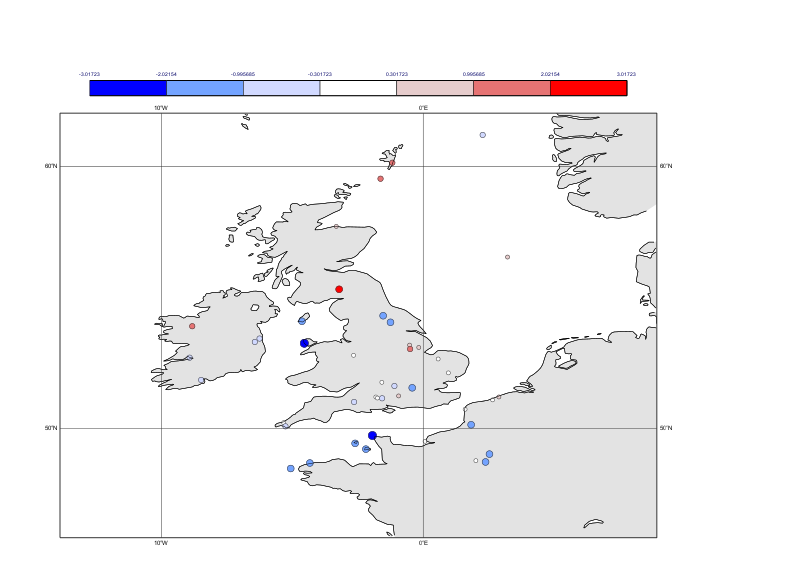

In [8]:
mv.plot(area_view, diff, diff_symb)

# Additional resources

- [Introductory Metview training course](https://confluence.ecmwf.int/display/METV/Data+analysis+and+visualisation+using+Metview)
- [Metview's Python interface](https://confluence.ecmwf.int/display/METV/Metview%27s+Python+Interface)
- [Function list](https://confluence.ecmwf.int/display/METV/List+of+Operators+and+Functions)
- [Gallery example (field-obs difference)](https://confluence.ecmwf.int/display/METV/Model-Obs%20Difference%20Example)